# Convergence classes

BigDFT uses wavelets on a discretization grid to represent the wavefunction and density of the electronic system. The key parameters of a BigDFT calculation therefore are the grid spacing (noted `hgrids`) and the grid extension (noted `rmult`). The convergence of a given BigDFT calculation with respect to those two parameters can easily be studied via two classes: [HgridsConvergence](https://mmoriniere.gitlab.io/MyBigDFT/hgrids_convergence.html) and [RmultConvergence](https://mmoriniere.gitlab.io/MyBigDFT/rmult_convergence.html). Both will be used here in the case of the N$_2$ molecule with the LDA exchange-correlation potential.

In [1]:
# Import the relevant modules, classes and constant.
import numpy as np
import matplotlib.pyplot as plt
from mybigdft import Posinp, Atom, InputParams, Job
from mybigdft.globals import EV_TO_HA

## hgrids convergence

The `HgridsConvergence` class allows to run all the necessary calculations to determine the largest `hgrids` which must be used so that the energy error compared to the reference calculation (with the lowest `hgrids` considered) lie within the required precision per atom. Using the largest `hgrids` as possible allows to save computational time because there are less grid points (or degrees of freedom).

In [2]:
from mybigdft.workflows.convergences import HgridsConvergence

atoms = [Atom('N', [0, 0, 0]), Atom('N', [0, 0, 1.1])]
pos = Posinp(atoms, units="angstroem", boundary_conditions="free")
inp = InputParams()
base = Job(inputparams=inp, posinp=pos, run_dir="N2/hgrids_convergence", name="N2")
hgc = HgridsConvergence(base, [0.24]*3, [0.5]*3, 14, precision_per_atom=0.01*EV_TO_HA)

The jobs in the queue have an extra attribute `hgrids`:

In [3]:
for job in hgc.queue:
    print(job.hgrids)

[0.24, 0.24, 0.24]
[0.26, 0.26, 0.26]
[0.27999999999999997, 0.27999999999999997, 0.27999999999999997]
[0.3, 0.3, 0.3]
[0.32, 0.32, 0.32]
[0.33999999999999997, 0.33999999999999997, 0.33999999999999997]
[0.36, 0.36, 0.36]
[0.38, 0.38, 0.38]
[0.4, 0.4, 0.4]
[0.42, 0.42, 0.42]
[0.44, 0.44, 0.44]
[0.46, 0.46, 0.46]
[0.48, 0.48, 0.48]
[0.5, 0.5, 0.5]


You can run the calculations as usual:

In [4]:
hgc.run(nmpi=6, nomp=3)

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/hgrids_convergence/0.24_0.24_0.24
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/hgrids_convergence/0.26_0.26_0.26
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/hgrids_convergence/0.27999999999999997_0.27999999999999997_0.27999999999999997
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/hgrids_convergence/0.3_0.3_0.3
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/hgrids_convergence/0.32_0.32_0.32
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/hgrids_convergence/0.33999999999999997_0.33999999999999997_0.33999999999999997
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/

Once the calculations are performed, a converged job is determined. It corresponds to the one with the largest `hgrids` so that the total energy of the system is below the convergence threshold, defined by the sum of the minimal energy found (for the smallest `hgrids`) and the user defined precision per atom. It can be accessed via the `converged` attribute:

In [5]:
hgc.converged.hgrids

[0.36, 0.36, 0.36]

The result of the previous cell shows that `hgrids = 0.36` gives converged results. To make sure that everything ran as expected, all the relevant data can be accessed as follows:

In [6]:
n_at = len(hgc.converged.posinp)
for job in hgc.queue:
    print("[{:.2f}, {:.2f}, {:.2f}]: error={:.2e}, threshold={:.2e}, is_converged={}"
          .format(*job.hgrids, (job.logfile.energy-hgc.queue[0].logfile.energy)/n_at,
                  hgc.precision_per_atom, job.is_converged))

[0.24, 0.24, 0.24]: error=0.00e+00, threshold=3.67e-04, is_converged=True
[0.26, 0.26, 0.26]: error=3.74e-07, threshold=3.67e-04, is_converged=True
[0.28, 0.28, 0.28]: error=2.63e-05, threshold=3.67e-04, is_converged=True
[0.30, 0.30, 0.30]: error=4.53e-05, threshold=3.67e-04, is_converged=True
[0.32, 0.32, 0.32]: error=1.23e-04, threshold=3.67e-04, is_converged=True
[0.34, 0.34, 0.34]: error=1.87e-04, threshold=3.67e-04, is_converged=True
[0.36, 0.36, 0.36]: error=3.46e-04, threshold=3.67e-04, is_converged=True
[0.38, 0.38, 0.38]: error=5.88e-04, threshold=3.67e-04, is_converged=False
[0.40, 0.40, 0.40]: error=8.43e-04, threshold=3.67e-04, is_converged=False
[0.42, 0.42, 0.42]: error=1.22e-03, threshold=3.67e-04, is_converged=False
[0.44, 0.44, 0.44]: error=1.84e-03, threshold=3.67e-04, is_converged=False
[0.46, 0.46, 0.46]: error=2.56e-03, threshold=3.67e-04, is_converged=False
[0.48, 0.48, 0.48]: error=3.45e-03, threshold=3.67e-04, is_converged=False
[0.50, 0.50, 0.50]: error=4.73e-

It shows that everything ran as expected: the calculation with `hgrids = 0.36` has the largest `hgrids` while still having an energy below the requested threshold.

### Plotting the convergence

The figure below shows the convergence of the total energy of the N$_2$ system with respect to `hgrids`. The threshold value is also shown for comparison.

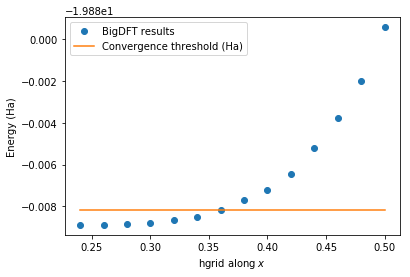

In [7]:
energies = [job.logfile.energy for job in hgc.queue]
hgrids = [job.hgrids for job in hgc.queue]
simple_hgrids = [hgrid[0] for hgrid in hgrids]
converged_energy = min(energies) + len(hgc.queue[0].posinp)*hgc.precision_per_atom

fig=plt.figure()
fig.patch.set_facecolor('white')  # When dark background
plt.plot(simple_hgrids, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(simple_hgrids, [converged_energy]*len(energies), label="Convergence threshold (Ha)")
plt.xlabel("hgrid along $x$")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

### Fitting the convergence

One can fit the convergence curve with scipy. Different laws are used here (polynomial and exponential). The resulting fits are not that convincing because their precision is lower than the expected precision.

In [8]:
from scipy.optimize import curve_fit

#### Order 4 polynomial fit

In [9]:
results = curve_fit(lambda t,a,b,c,d,e: a+b*t+c*t**2+d*t**3+e*t**4, simple_hgrids, energies)
print("converged_energy = {}".format(results[0][0]))

converged_energy = -19.871951242440776


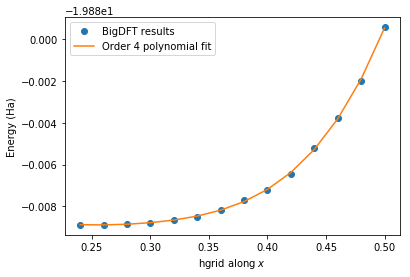

In [10]:
[a, b, c, d, e] = results[0].tolist()
t = np.array(simple_hgrids)
fit = a+b*t+c*t**2+d*t**3+e*t**4

fig=plt.figure()
fig.patch.set_facecolor('white')
plt.plot(simple_hgrids, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(simple_hgrids, fit, label="Order 4 polynomial fit")
plt.xlabel("hgrid along $x$")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

#### Order 3 polynomial fit

In [11]:
results = curve_fit(lambda t,a,b,c,d: a+b*t+c*t**2+d*t**3, simple_hgrids, energies)
print("converged_energy = {}".format(results[0][0]))

converged_energy = -19.91198997626724


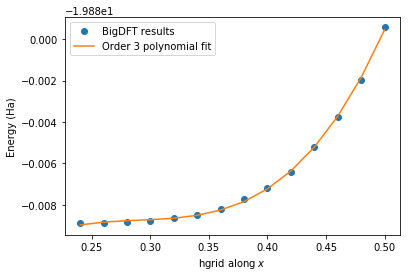

In [12]:
[a, b, c, d] = results[0].tolist()
t = np.array(simple_hgrids)
fit = a+b*t+c*t**2+d*t**3

fig=plt.figure()
fig.patch.set_facecolor('white')
plt.plot(simple_hgrids, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(simple_hgrids, fit, label="Order 3 polynomial fit")
plt.xlabel("hgrid along $x$")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

#### Exponential fit

In [13]:
results = curve_fit(lambda t,a,b: a*np.exp(b*t), simple_hgrids, energies)
print("converged_energy = {}".format(results[0][0]))

converged_energy = -19.898196464679767


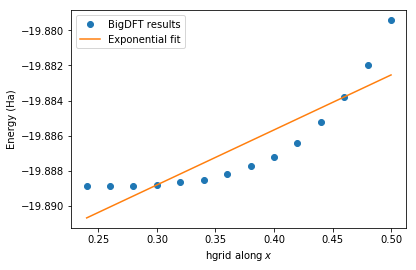

In [14]:
[a, b] = results[0].tolist()
t = np.array(simple_hgrids)
fit = a*np.exp(b*t)

fig=plt.figure()
fig.patch.set_facecolor('white')
plt.plot(simple_hgrids, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(simple_hgrids, fit, label="Exponential fit")
plt.xlabel("hgrid along $x$")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

## rmult convergence
    
The `RmultConvergence` class allows to run all the necessary calculations to determine the smallest grid extensions which must be used so that the energy error compared to the reference calculation (with the lowest `hgrids` considered) lie within the required precision per atom. Using the smallest `rmult` as possible allows to save computational time because there are less grid points (or degrees of freedom). There are actually two grids centered on the atoms of the system: a coarse grid, with a shorter extension and one fine grid, with a longer extension.

We use a tighter precision per atom here (1 meV instead of 10 meV) in order to make sure that the accuracy achieved with the `hgrids` does not increase too much.

In [15]:
from mybigdft.workflows.convergences import RmultConvergence

atoms = [Atom('N', [0, 0, 0]), Atom('N', [0, 0, 1.1])]
pos = Posinp(atoms, units="angstroem", boundary_conditions="free")
inp = InputParams({"dft": {"hgrids": hgc.converged.hgrids}})
base = Job(inputparams=inp, posinp=pos, run_dir="N2/rmult_convergence", name="N2")
rmc = RmultConvergence(base, [4, 6], [7, 9], 4, precision_per_atom=0.001*EV_TO_HA)

The jobs in the queue have an extra attribute `rmult`:

In [16]:
for job in rmc.queue:
    print(job.rmult)

[4.0, 6.0]
[5.0, 7.0]
[6.0, 8.0]
[7.0, 9.0]


You can run the calculations as usual:

In [17]:
rmc.run(nmpi=6, nomp=3)

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/4.0_6.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/5.0_7.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_8.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/7.0_9.0
Logfile log-N2.yaml already exists!



Once the calculations are performed, a converged job is determined. It corresponds to the one with the smallest `rmult` so that the total energy of the system is below the convergence threshold, defined by the sum of the energy found for the largest `rmult` and the user defined precision per atom. It can be accessed via the `converged` attribute:

In [18]:
rmc.converged.rmult

[6.0, 8.0]

The result of the previous cell shows that `rmult = [6.0, 8.0]` gives converged results. To make sure that everything ran as expected, all the relevant data can be accessed as follows:

In [19]:
n_at = len(rmc.converged.posinp)
for job in rmc.queue:
    print("[{:.1f}, {:.1f}]: error={:.2e}, threshold={:.2e}, is_converged={}"
          .format(*job.rmult, (job.logfile.energy-rmc.queue[-1].logfile.energy)/n_at,
                  rmc.precision_per_atom, job.is_converged))

[4.0, 6.0]: error=1.95e-03, threshold=3.67e-05, is_converged=False
[5.0, 7.0]: error=1.59e-04, threshold=3.67e-05, is_converged=False
[6.0, 8.0]: error=1.23e-05, threshold=3.67e-05, is_converged=True
[7.0, 9.0]: error=0.00e+00, threshold=3.67e-05, is_converged=True


### Plotting the convergence

The figure below shows the convergence of the total energy of the N$_2$ system with respect to the rmult. The threshold is also shown for comparison.

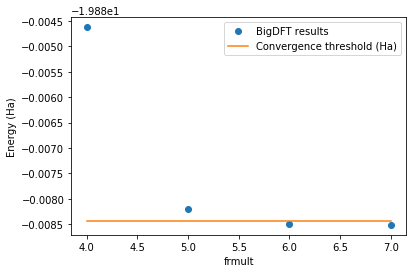

In [20]:
energies = [job.logfile.energy for job in rmc.queue]
rmults = [job.rmult for job in rmc.queue]
frmult = [rmult[0] for rmult in rmults]
converged_energy = min(energies) + len(rmc.queue[0].posinp)*rmc.precision_per_atom

fig=plt.figure()
fig.patch.set_facecolor('white')  # When dark background
plt.plot(frmult, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(frmult, [converged_energy]*len(energies), label="Convergence threshold (Ha)")
plt.xlabel("frmult")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

From there, one sees that using `rmult = [6.0, 8.0]` and `hgrids = 0.36` gives converged results.

Remember that there are actually two grids: one known as the fine grid, the other being the coarse one. The former is more expensive (from a computational point of view) than the latter, and should therefore have a smaller extension. One could perform a more refined rmult convergence by testing the convergence with respect to the fine and then coarse grid extensions.

### frmult convergence

Let us start with the convergence of the fine grid:

In [21]:
crm = rmc.converged.rmult[1]  # Let us use the previous converged extension for the coarse grid
frmc = RmultConvergence(base, [crm-4, crm], [crm, crm], 5, precision_per_atom=0.001*EV_TO_HA)

In [22]:
frmc.run(nmpi=6, nomp=3)

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/4.0_8.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/5.0_8.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_8.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/7.0_8.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/8.0_8.0
Logfile log-N2.yaml already exists!



Nothing changed: the 6.0 `rmult` for the fine grid still gives converged results:

In [23]:
n_at = len(frmc.converged.posinp)
for job in frmc.queue:
    print("[{:.1f}, {:.1f}]: error={:.2e}, threshold={:.2e}, is_converged={}"
          .format(*job.rmult, (job.logfile.energy-frmc.queue[-1].logfile.energy)/n_at,
                  frmc.precision_per_atom, job.is_converged))

[4.0, 8.0]: error=1.93e-03, threshold=3.67e-05, is_converged=False
[5.0, 8.0]: error=1.61e-04, threshold=3.67e-05, is_converged=False
[6.0, 8.0]: error=1.41e-05, threshold=3.67e-05, is_converged=True
[7.0, 8.0]: error=2.06e-06, threshold=3.67e-05, is_converged=True
[8.0, 8.0]: error=0.00e+00, threshold=3.67e-05, is_converged=True


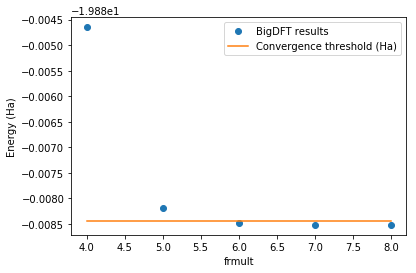

In [24]:
energies = [job.logfile.energy for job in frmc.queue]
rmults = [job.rmult for job in frmc.queue]
frmult = [rmult[0] for rmult in rmults]
converged_energy = min(energies) + len(frmc.queue[0].posinp)*frmc.precision_per_atom

fig=plt.figure()
fig.patch.set_facecolor('white')  # When dark background
plt.plot(frmult, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(frmult, [converged_energy]*len(energies), label="Convergence threshold (Ha)")
plt.xlabel("frmult")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

### crmult convergence

Let us now perform the convergence with respect to the coarse grid multiplying factor:

In [25]:
frm = frmc.converged.rmult[0]  # Starting from the converged frmult found above
crmc = RmultConvergence(base, [frm, frm-2], [frm, max(crm, frm+2)], 5, precision_per_atom=0.001*EV_TO_HA)

In [26]:
crmc.run(nmpi=6, nomp=3)

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_4.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_5.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_6.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_7.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/rmult_convergence/6.0_8.0
Logfile log-N2.yaml already exists!



/Users/maximemoriniere/Documents/Python/MyBigDFT/mybigdft/workflows/convergences.py:352: UserWarning: The job with minimal energy does not correspond to the job with maximal rmult
  "to the job with maximal rmult", UserWarning)


In [27]:
n_at = len(crmc.converged.posinp)
for job in crmc.queue:
    print("[{:.1f}, {:.1f}]: error={:.2e}, threshold={:.2e}, is_converged={}"
          .format(*job.rmult, (job.logfile.energy-crmc.queue[-1].logfile.energy)/n_at,
                  crmc.precision_per_atom, job.is_converged))

[6.0, 4.0]: error=1.32e-03, threshold=3.67e-05, is_converged=False
[6.0, 5.0]: error=2.28e-04, threshold=3.67e-05, is_converged=False
[6.0, 6.0]: error=7.93e-06, threshold=3.67e-05, is_converged=True
[6.0, 7.0]: error=-1.59e-06, threshold=3.67e-05, is_converged=True
[6.0, 8.0]: error=0.00e+00, threshold=3.67e-05, is_converged=True


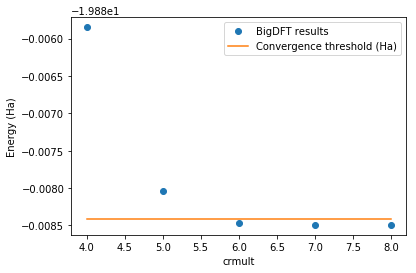

In [28]:
energies = [job.logfile.energy for job in crmc.queue]
rmults = [job.rmult for job in crmc.queue]
crmult = [rmult[1] for rmult in rmults]
converged_energy = min(energies) + len(crmc.queue[0].posinp)*crmc.precision_per_atom

fig=plt.figure()
fig.patch.set_facecolor('white')  # When dark background
plt.plot(crmult, energies, label="BigDFT results", marker="o", linestyle='')
plt.plot(crmult, [converged_energy]*len(energies), label="Convergence threshold (Ha)")
plt.xlabel("crmult")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.show()

Using a grid with a grid spacing of 0.36 and fine and coarse radius multiplying factors of 6.0 seem sufficient to obtain converged results within a precision of 10 meV per atom for the N$_2$ molecule.